**Pre Step:**
Libraries loading

In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam, SGD
from keras.applications import VGG16, ResNet50
from keras.applications.vgg16 import preprocess_input as preprocess_vgg
from keras.applications.resnet50 import preprocess_input as preprocess_resnet


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam


import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content



# **Step 1: Data Preparation**
1. Load the dataset: Read the images from the train, test, and predict folders.
2. Split the training data: Split the train data into training and validation sets (e.g.,
80% training, 20% validation).
3. Data Augmentation: Apply data augmentation techniques to increase the diversity of
your training data (e.g., rotations, flips, zooms).


In [3]:
# Step 1: Data Preparation
# Load and preprocess data

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Load the dataset: Read the images from the train, test, and predict folders.**

In [4]:
# Path to the training data directory
training_folder_name = '/content/gdrive/MyDrive/MY_data/train'

# All images are 128x128 pixels
img_size = (128,128)

# The folder contains a subfolder for each class of shape
classes = sorted(os.listdir(training_folder_name))
print(classes)


['Apple', 'Banana', 'avocado', 'cherry', 'kiwi', 'mango', 'orange', 'pinenapple', 'strawberries', 'watermelon']


**Split the training data: Split the train data into training and validation sets (e.g., 80% training, 20% validation).**

**Data Augmentation: Apply data augmentation techniques to increase the diversity of your training data (e.g., rotations, flips, zooms).**

In [22]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 30

#Data Augmentation Process
print("Getting Data...")
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    validation_split=0.2,  # Hold back 20% of the images for validation
    rotation_range=40,  # Random rotations
    width_shift_range=0.2,  # Horizontal shifts
    height_shift_range=0.2,  # Vertical shifts
    shear_range=0.2,  # Shear transformations
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Random horizontal flips
    fill_mode='nearest'  # Fill mode for new pixels
)

print("Preparing training dataset...")
train_generator = datagen.flow_from_directory(
    training_folder_name,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

print("Preparing validation dataset...")
validation_generator = datagen.flow_from_directory(
    training_folder_name,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data

Getting Data...
Preparing training dataset...
Found 1842 images belonging to 10 classes.
Preparing validation dataset...
Found 460 images belonging to 10 classes.


# Step 2: Build a Custom Neural Network
1. Architecture: Design a custom neural network suitable for image classification.
2. Compile the model: Choose an appropriate loss function, optimizer, and metrics.
3. Train the model: Experiment with different learning rates, batch sizes, and
optimization methods (e.g., SGD, Adam).
4. Evaluate the model: Evaluate the performance of your model on the validation and
test sets.
5. Record the results: Document the performance metrics and any observations.

reference code from this colab: https://colab.research.google.com/drive/1oNEBID6bRLVYQb6zo14G-KYi6U5yUiWl#scrollTo=_J35i8Ofhjxa

**Installing YOLO and Downloading Pre-Trained Weights**



Architecture: Design a custom neural network suitable for image classification.

Compile the model: Choose an appropriate loss function, optimizer, and metrics. **bold text**

In [23]:
# Define a CNN classifier network
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense
from keras import optimizers
import tensorflow as tf

#Dense is the fully connected layer
#Flatten is used after all CNN layers and before fully connected layer
#Conv2D is the 2D convolution layer
#MaxPooling2D is the 2D maxx pooling layer

# Define the model as a sequence of layers
model = Sequential()

# The input layer accepts an image and applies a convolution that uses 32 6x6 filters and a rectified linear unit activation function
model.add(Conv2D(32, (6, 6), input_shape=train_generator.image_shape, activation='relu'))

# Next we'll add a max pooling layer with a 2x2 patch
model.add(MaxPooling2D(pool_size=(2,2)))

# We can add as many layers as we think necessary - here we'll add another convolution layer and another and max poolinglayer
model.add(Conv2D(32, (6, 6), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Now we'll flatten the feature maps and generate an output layer with a predicted probability for each class
model.add(Flatten())
model.add(Dense(train_generator.num_classes, activation='softmax'))

# We'll use the ADAM optimizer
#other optimizers can also be used for example SGD stochastic gradient descent
opt = tf.optimizers.Adam(learning_rate=0.001)

# With the layers defined, we can now compile the model for categorical (multi-class) classification
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 123, 123, 32)      3488      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 61, 61, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 56, 56, 32)        36896     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 28, 28, 32)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_3 (Dense)             (None, 10)               

**Train the model: Experiment with different learning rates, batch sizes, and optimization methods (e.g., SGD, Adam).**

In [24]:
# Train the model over 10 epochs
num_epochs = 10
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    epochs = num_epochs)



Epoch 1/10
61/61 [==============================] - 102s 2s/step - loss: 2.0757 - accuracy: 0.1882 - val_loss: 1.8495 - val_accuracy: 0.2556
Epoch 2/10
61/61 [==============================] - 96s 2s/step - loss: 1.7523 - accuracy: 0.3212 - val_loss: 1.6339 - val_accuracy: 0.4044
Epoch 3/10
61/61 [==============================] - 96s 2s/step - loss: 1.6357 - accuracy: 0.3825 - val_loss: 1.6007 - val_accuracy: 0.3711
Epoch 4/10
61/61 [==============================] - 95s 2s/step - loss: 1.5960 - accuracy: 0.3951 - val_loss: 1.5530 - val_accuracy: 0.4244
Epoch 5/10
61/61 [==============================] - 97s 2s/step - loss: 1.5804 - accuracy: 0.4034 - val_loss: 1.4384 - val_accuracy: 0.4422
Epoch 6/10
61/61 [==============================] - 95s 2s/step - loss: 1.5113 - accuracy: 0.4371 - val_loss: 1.4568 - val_accuracy: 0.4533
Epoch 7/10
61/61 [==============================] - 95s 2s/step - loss: 1.4678 - accuracy: 0.4404 - val_loss: 1.4618 - val_accuracy: 0.4267
Epoch 8/10
61/61 [=

**Evaluating and Recording the Results**

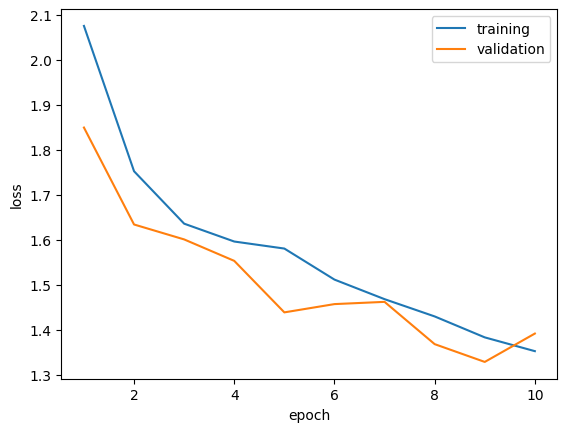

In [25]:
#Recording the training and validation loss to epochs
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

Generating predictions from validation data...
1/1 [==============================] - 0s 354ms/step


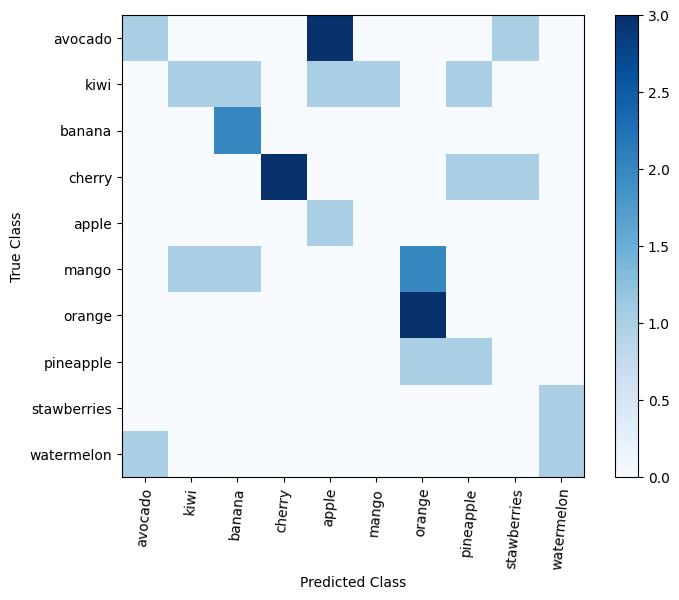

In [26]:
# Plotting a confussion matrix to further evaluate the model based on classification ability
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

print("Generating predictions from validation data...")
# Get the image and label arrays for the first batch of validation data
x_test = validation_generator[0][0]
y_test = validation_generator[0][1]

# Use the moedl to predict the class
class_probabilities = model.predict(x_test)

# The model returns a probability value for each class
# The one with the highest probability is the predicted class
predictions = np.argmax(class_probabilities, axis=1)

# The actual labels are hot encoded (e.g. [0 1 0], so get the one with the value 1
true_labels = np.argmax(y_test, axis=1)

# Define the class names as the types of fruits
classes = ['avocado','kiwi', 'banana', 'cherry', 'apple', 'mango','orange','pineapple','stawberries','watermelon']

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=85)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [27]:
from keras.models import load_model

modelFileName = 'fruit-classifier.h5'

model.save(modelFileName) # saves the trained model
print("Model saved.")

del model  # deletes the existing model variable

Model saved.


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Step 3: Transfer Learning
1. Choose pre-trained models: Select at least two pre-trained models (e.g., VGG16,
ResNet50, MobileNet).
2. Fine-tune the models: Replace the top layer(s) of the pre-trained models with layers
suitable for your classification task.
3. Compile the models: Choose appropriate loss functions, optimizers, and metrics.
4. Train the models: Fine-tune the pre-trained models on your dataset. Experiment with
different hyperparameters.
5. Evaluate the models: Assess the performance on the validation and test sets.
6. Record the results: Document the performance metrics and any observations


**Choose pre-trained models: Select at least two pre-trained models (e.g., VGG16, ResNet50, MobileNet).**

In [28]:
#First pre-training with VGG16
from keras.applications.vgg16 import VGG16
#Load the base model, not including its final connected layer, and set the input shape to match our images
base_model = VGG16(weights='imagenet', include_top=False, input_shape=train_generator.image_shape)




**Fine-tune the models: Replace the top layer(s) of the pre-trained models with layers suitable for your classification task.**

**Compile the models: Choose appropriate loss functions, optimizers, and metrics.**

In [29]:
# Compiling and fine-tuning the model
from keras import Model
from keras.layers import Flatten, Dense
from keras import optimizers

# Freeze the already-trained layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Create layers for classification of our images
x = base_model.output
x = Flatten()(x)
prediction_layer = Dense(len(classes), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=prediction_layer)

# Compile the model
opt = optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Now print the full model, which will include the layers of the base model plus the dense layer we added
print(model.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

**Train the models: Fine-tune the pre-trained models on your dataset. Experiment with different hyperparameters.**

In [31]:

# Train the model over 3 epoch using 15-image batches and using the validation holdout dataset for validation
num_epochs = 3
steps_per_epoch = train_generator.samples // 15
validation_steps = validation_generator.samples // 15

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    epochs=num_epochs
)

Epoch 1/3
 62/122 [==============>...............] - ETA: 6:36 - loss: 1.1485 - accuracy: 0.6292

122/122 [==============================] - 556s 5s/step - loss: 1.1485 - accuracy: 0.6292 - val_loss: 1.1428 - val_accuracy: 0.6022


**Evaluate and Recording Results with the Transfer Learning**


In [32]:
# Evaluate the model on the validation set
evaluation = model.evaluate_generator(validation_generator, steps=validation_generator.samples // batch_size)

# Extract evaluation metrics
validation_loss = evaluation[0]
validation_accuracy = evaluation[1]

# Record the results
print("Validation Loss:", validation_loss)
print("Validation Accuracy:", validation_accuracy)

<ipython-input-32-282ccea8bd71>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  evaluation = model.evaluate_generator(validation_generator, steps=validation_generator.samples // batch_size)


Validation Loss: 1.104758858680725
Validation Accuracy: 0.6466666460037231


**Do all the above again but for ResNet50**


In [33]:
from keras.applications import ResNet50
from keras import Model
from keras.layers import Flatten, Dense
from keras import optimizers

# Load the ResNet50 model, excluding the top (final) layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=train_generator.image_shape)

# Freeze the already-trained layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Create layers for classification of our images
x = base_model.output
x = Flatten()(x)
prediction_layer = Dense(len(classes), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=prediction_layer)

# Compile the model
opt = optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Now print the full model, which will include the layers of the base model plus the dense layer we added
print(model.summary())


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 134, 134, 3)          0         ['input_4[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 64, 64, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 64, 64, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [34]:

# Train the model over 3 epoch using 15-image batches and using the validation holdout dataset for validation
num_epochs = 3
steps_per_epoch = train_generator.samples // 15
validation_steps = validation_generator.samples // 15

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    epochs=num_epochs
)

Epoch 1/3
 62/122 [==============>...............] - ETA: 2:04 - loss: 2.3890 - accuracy: 0.1390

122/122 [==============================] - 179s 1s/step - loss: 2.3890 - accuracy: 0.1390 - val_loss: 2.3795 - val_accuracy: 0.1283


In [35]:
# Evaluate the model on the validation set
evaluation = model.evaluate_generator(validation_generator, steps=validation_generator.samples // batch_size)

# Extract evaluation metrics
validation_loss = evaluation[0]
validation_accuracy = evaluation[1]

# Record the results
print("Validation Loss:", validation_loss)
print("Validation Accuracy:", validation_accuracy)

<ipython-input-35-282ccea8bd71>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  evaluation = model.evaluate_generator(validation_generator, steps=validation_generator.samples // batch_size)


Validation Loss: 2.372744083404541
Validation Accuracy: 0.12666666507720947


# Step 4: Prediction #
1. Load the prediction data: Load images from the predict folder.
2. Generate predictions: Use the best-performing models to generate predictions for the
images in the predict folder.
3. Visualize predictions: Display the images along with their predicted labels

In [36]:
# Helper function to resize image
def resize_image(src_img, size=(128,128), bg_color="white"):
    from PIL import Image

    # rescale the image so the longest edge is the right size
    src_img.thumbnail(size, Image.ANTIALIAS)

    # Create a new image of the right shape
    new_image = Image.new("RGB", size, bg_color)

    # Paste the rescaled image onto the new background
    new_image.paste(src_img, (int((size[0] - src_img.size[0]) / 2), int((size[1] - src_img.size[1]) / 2)))

    # return the resized image
    return new_image

# Function to predict the class of an image
def predict_image(classifier, image_array):
    import numpy as np

    # We need to format the input to match the training data
    # The data generator loaded the values as floating point numbers
    # and normalized the pixel values, so...
    img_features = image_array.astype('float32')
    img_features /= 255

    # These are the classes our model can predict
    classes = ['avocado','kiwi', 'banana', 'cherry', 'apple', 'mango','orange','pineapple','stawberries','watermelon']

    # Predict the class of each input image
    predictions = classifier.predict(img_features)

    predicted_classes = []
    for prediction in predictions:
        # The prediction for each image is the probability for each class, e.g. [0.8, 0.1, 0.2]
        # So get the index of the highest probability
        class_idx = np.argmax(prediction)
        # And append the corresponding class name to the results
        predicted_classes.append(classes[int(class_idx)])
    # Return the predictions
    return predicted_classes

print("Functions created - ready to use model for inference.")

Functions created - ready to use model for inference.


**Generate and Visualizing predictions: Use the best-performing models to generate predictions for the images in the predict folder.**

*I chose to use VGG16 because it is the better performing model.*

<ipython-input-36-4b2c17dcab05>:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  src_img.thumbnail(size, Image.ANTIALIAS)


1/1 [==============================] - 2s 2s/step
Image: img_421.jpeg
VGG16 Prediction: cherry



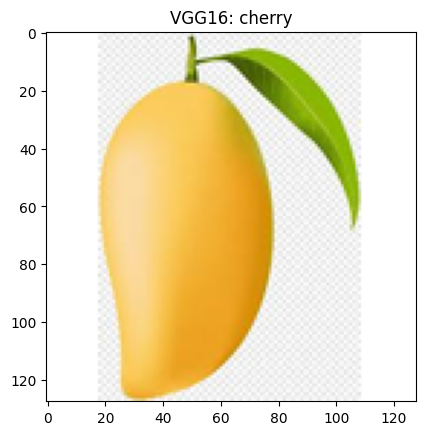

1/1 [==============================] - 0s 166ms/step
Image: img_11.jpeg
VGG16 Prediction: apple



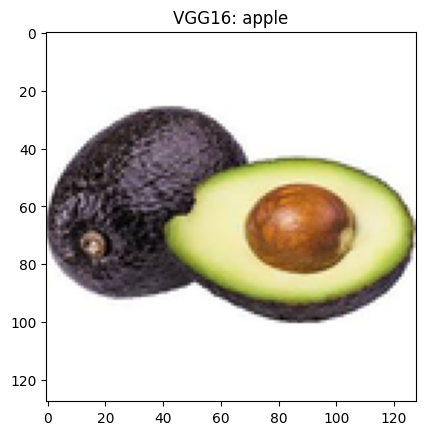

1/1 [==============================] - 0s 105ms/step
Image: f0.jpeg
VGG16 Prediction: cherry



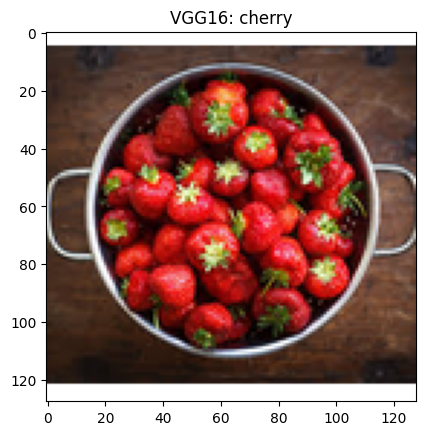

1/1 [==============================] - 0s 93ms/step
Image: 0.jpeg
VGG16 Prediction: banana



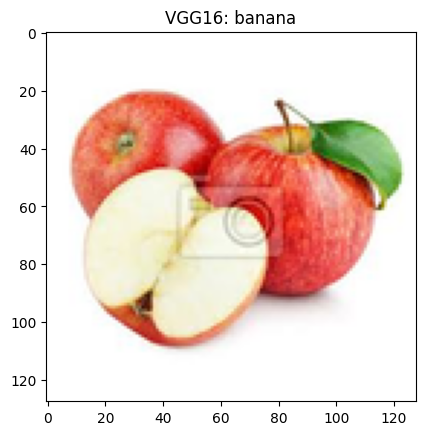

1/1 [==============================] - 0s 106ms/step
Image: 99.jpeg
VGG16 Prediction: banana



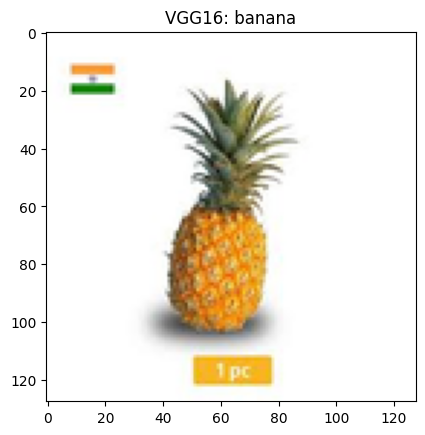

1/1 [==============================] - 0s 89ms/step
Image: img_171.jpeg
VGG16 Prediction: banana



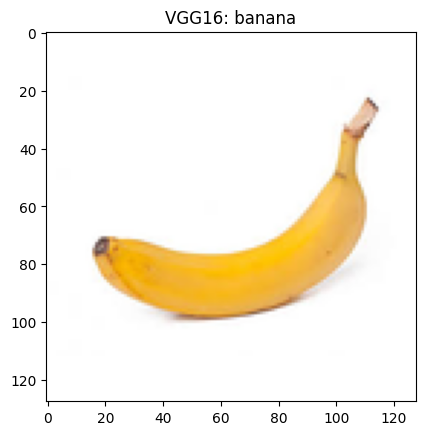

1/1 [==============================] - 0s 90ms/step
Image: 2.jpeg
VGG16 Prediction: cherry



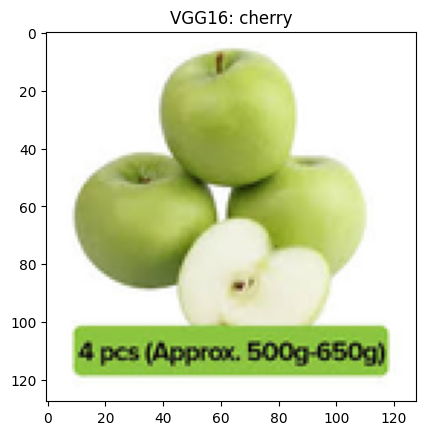

1/1 [==============================] - 0s 94ms/step
Image: 023.jpeg
VGG16 Prediction: cherry



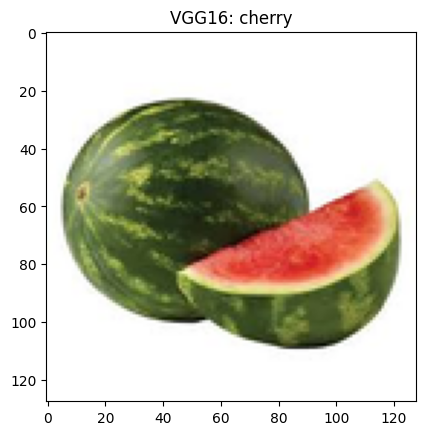

1/1 [==============================] - 0s 90ms/step
Image: img_141.jpeg
VGG16 Prediction: kiwi



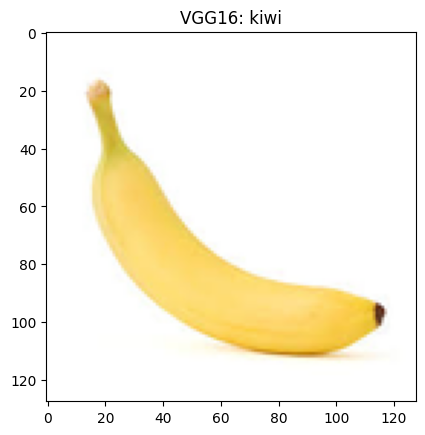

1/1 [==============================] - 0s 107ms/step
Image: 77.jpeg
VGG16 Prediction: cherry



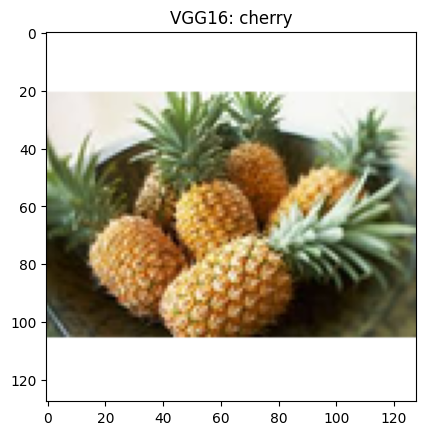

1/1 [==============================] - 0s 92ms/step
Image: img_411.jpeg
VGG16 Prediction: banana



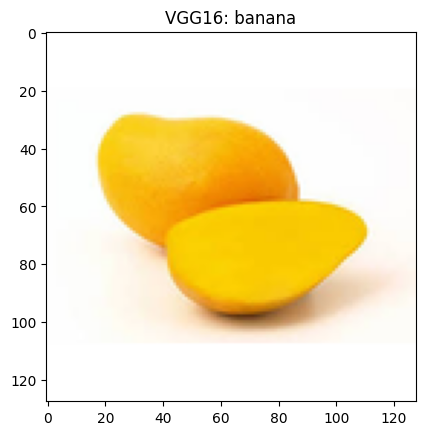

1/1 [==============================] - 0s 92ms/step
Image: 0122.jpeg
VGG16 Prediction: banana



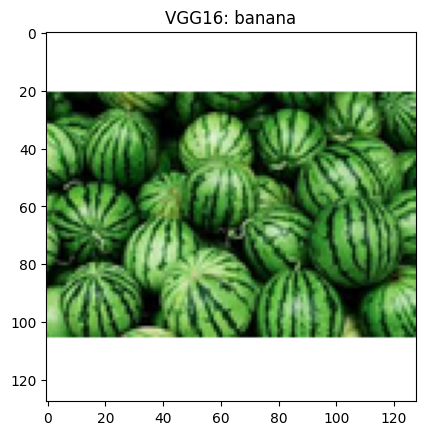

1/1 [==============================] - 0s 91ms/step
Image: 00.jpeg
VGG16 Prediction: cherry



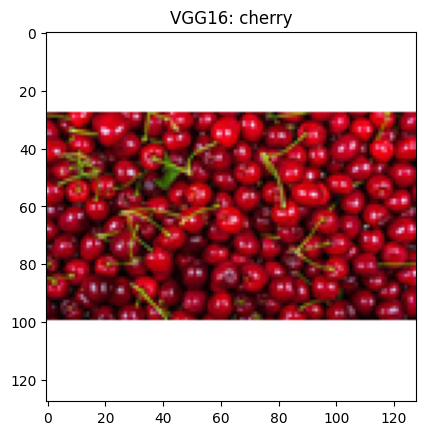

1/1 [==============================] - 0s 95ms/step
Image: 659.jpeg
VGG16 Prediction: banana



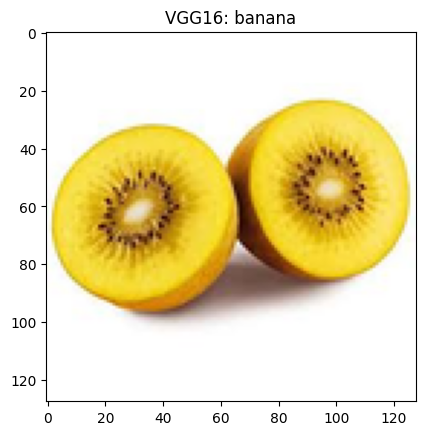

1/1 [==============================] - 0s 90ms/step
Image: 4.jpeg
VGG16 Prediction: cherry



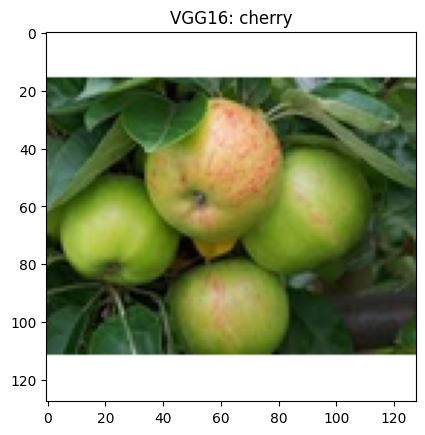

1/1 [==============================] - 0s 94ms/step
Image: 012.jpeg
VGG16 Prediction: banana



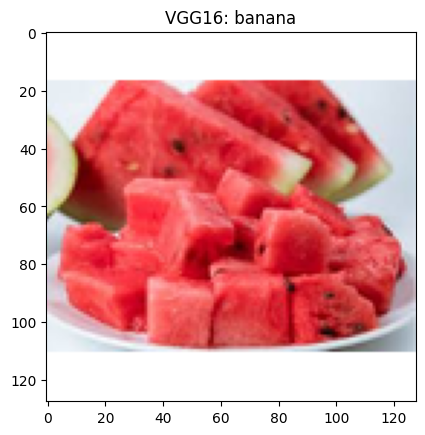

1/1 [==============================] - 0s 89ms/step
Image: img_241.jpeg
VGG16 Prediction: cherry



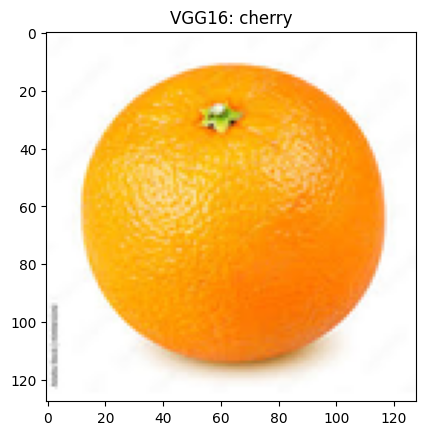

1/1 [==============================] - 0s 90ms/step
Image: 202.jpeg
VGG16 Prediction: avocado



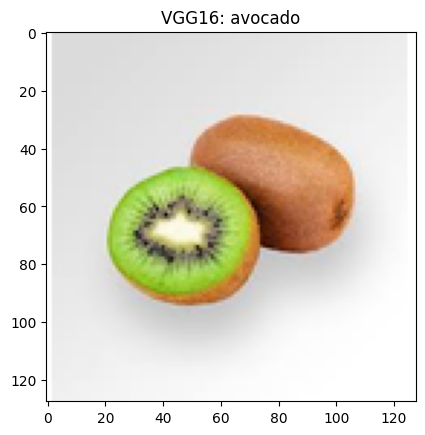

1/1 [==============================] - 0s 91ms/step
Image: 65.jpeg
VGG16 Prediction: cherry



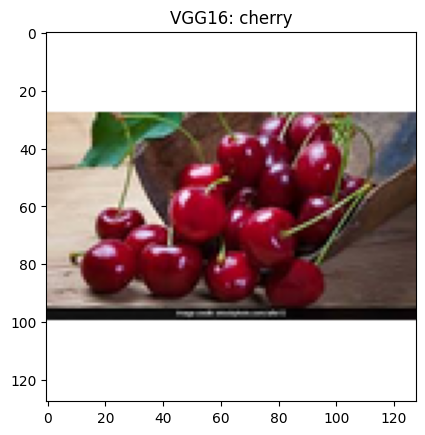

1/1 [==============================] - 0s 89ms/step
Image: img_01.jpeg
VGG16 Prediction: cherry



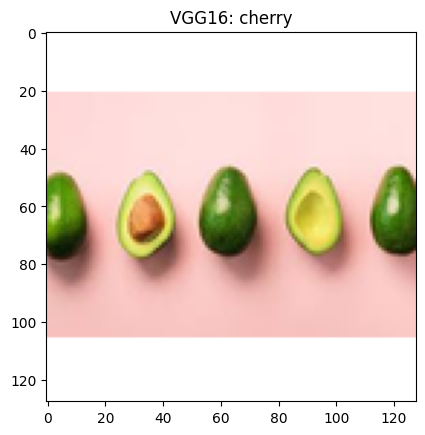

1/1 [==============================] - 0s 97ms/step
Image: f1.jpeg
VGG16 Prediction: cherry



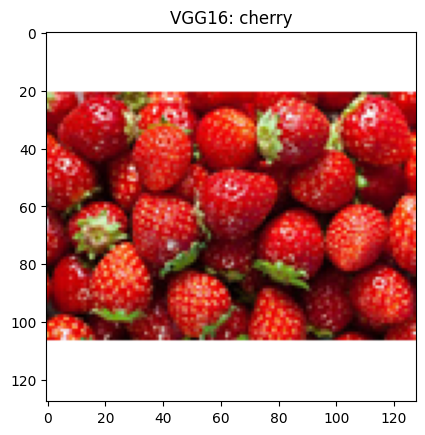

1/1 [==============================] - 0s 154ms/step
Image: img_191.jpeg
VGG16 Prediction: apple



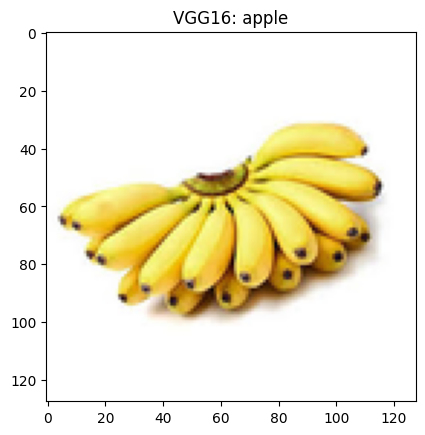

1/1 [==============================] - 0s 151ms/step
Image: 011.jpeg
VGG16 Prediction: cherry



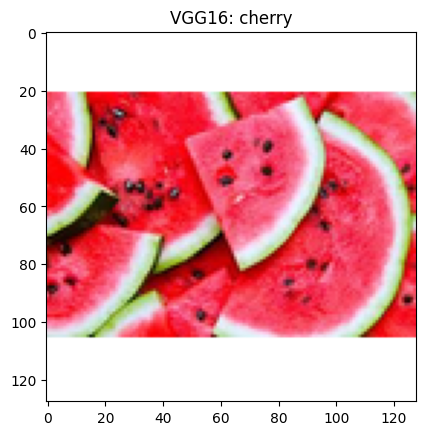

1/1 [==============================] - 0s 149ms/step
Image: 68.jpeg
VGG16 Prediction: cherry



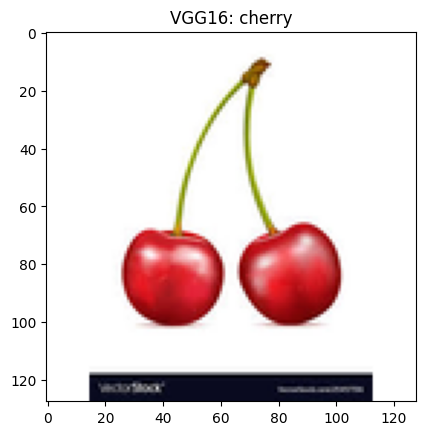

1/1 [==============================] - 0s 149ms/step
Image: img_361.jpeg
VGG16 Prediction: banana



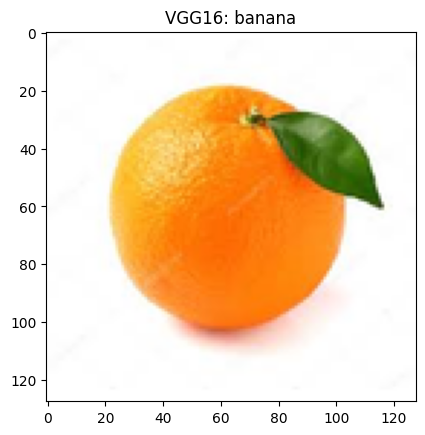

1/1 [==============================] - 0s 149ms/step
Image: f7.jpeg
VGG16 Prediction: cherry



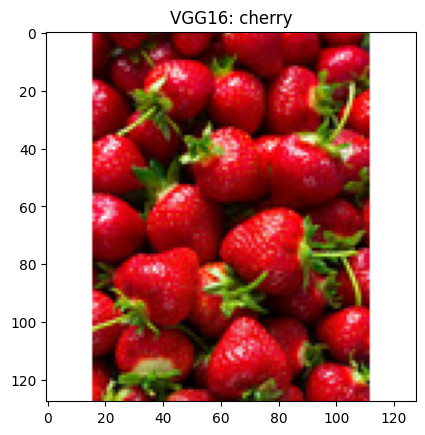

1/1 [==============================] - 0s 200ms/step
Image: f2.jpeg
VGG16 Prediction: cherry



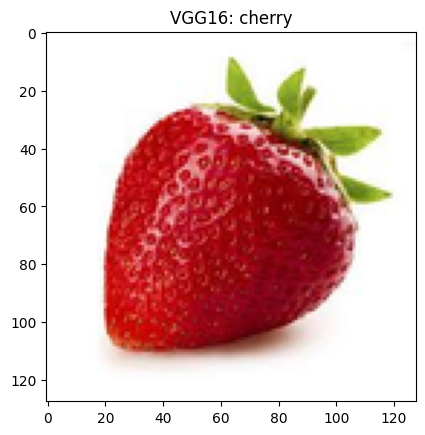

1/1 [==============================] - 0s 174ms/step
Image: img_371.jpeg
VGG16 Prediction: banana



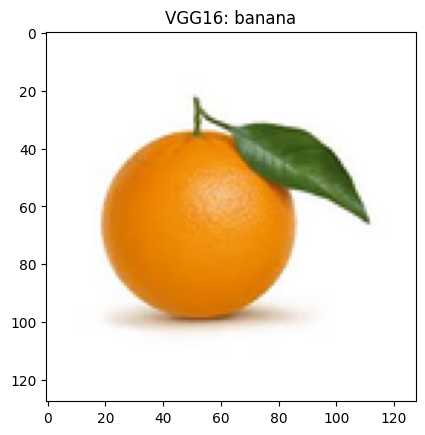

1/1 [==============================] - 0s 190ms/step
Image: img_381.jpeg
VGG16 Prediction: cherry



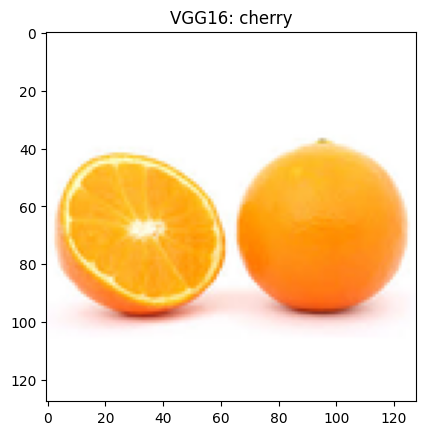

1/1 [==============================] - 0s 96ms/step
Image: 33.jpeg
VGG16 Prediction: avocado



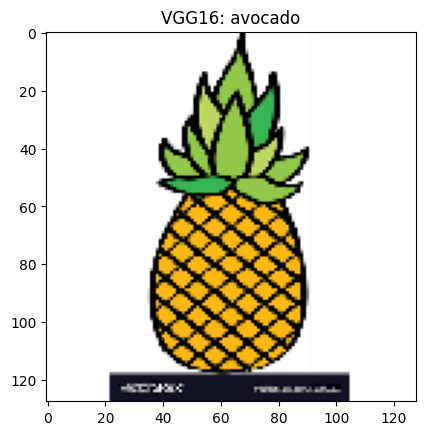

1/1 [==============================] - 0s 108ms/step
Image: 147.jpeg
VGG16 Prediction: cherry



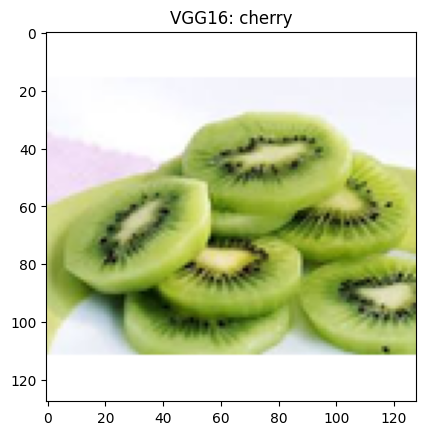

1/1 [==============================] - 0s 95ms/step
Image: 22.jpeg
VGG16 Prediction: banana



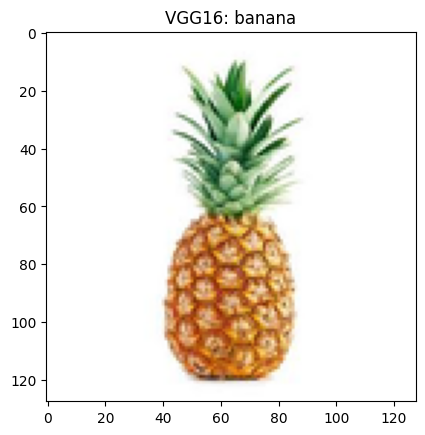

1/1 [==============================] - 0s 96ms/step
Image: 321.jpeg
VGG16 Prediction: banana



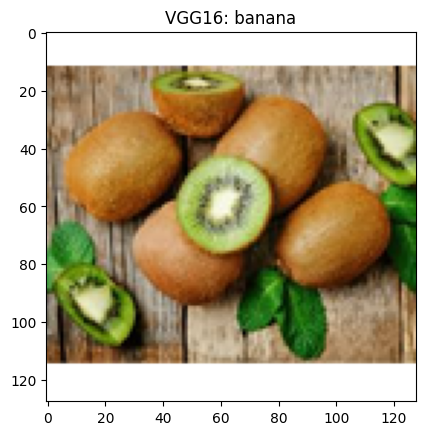

1/1 [==============================] - 0s 120ms/step
Image: img_341.jpeg
VGG16 Prediction: cherry



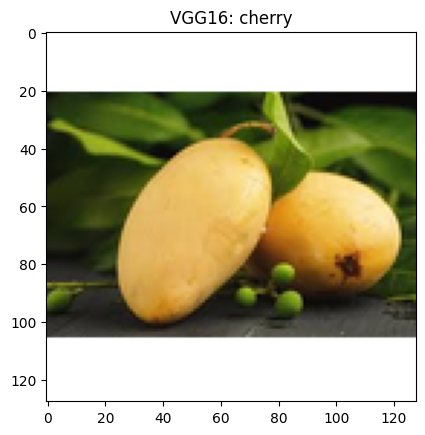

1/1 [==============================] - 0s 127ms/step
Image: f5.jpeg
VGG16 Prediction: cherry



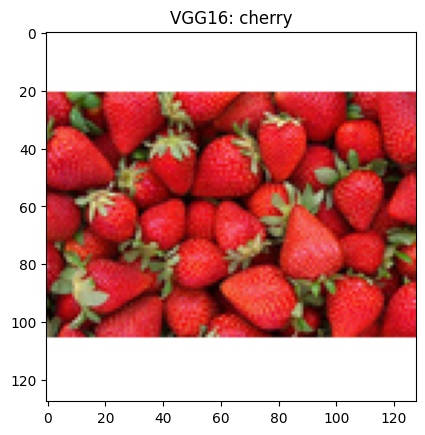

1/1 [==============================] - 0s 107ms/step
Image: img_401.jpeg
VGG16 Prediction: apple



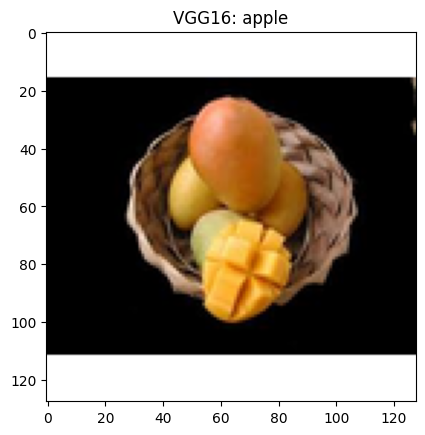

1/1 [==============================] - 0s 94ms/step
Image: 66.jpeg
VGG16 Prediction: banana



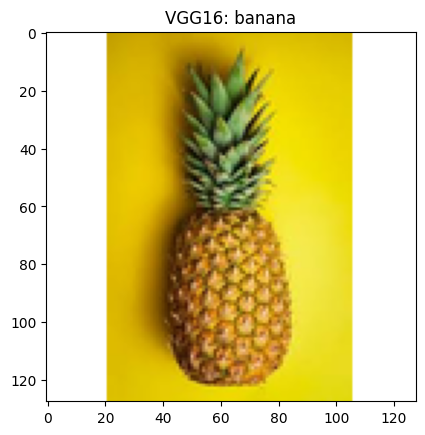

1/1 [==============================] - 0s 102ms/step
Image: img_121.jpeg
VGG16 Prediction: avocado



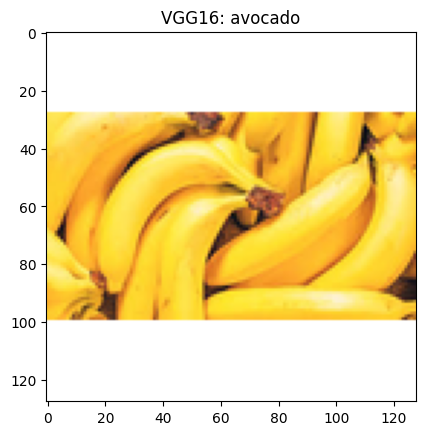

1/1 [==============================] - 0s 101ms/step
Image: 3.jpeg
VGG16 Prediction: watermelon



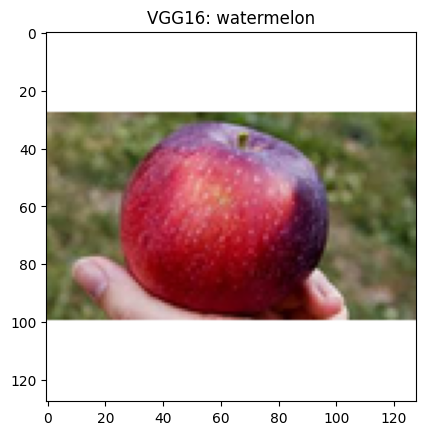

1/1 [==============================] - 0s 106ms/step
Image: img_21.jpeg
VGG16 Prediction: apple



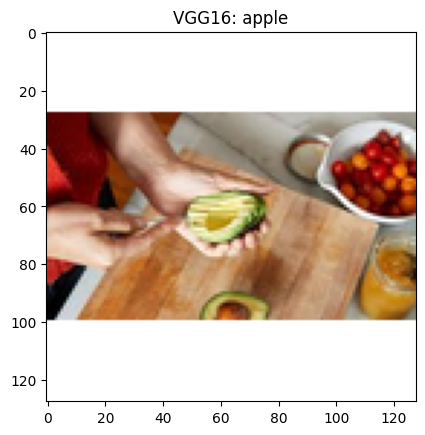

1/1 [==============================] - 0s 110ms/step
Image: 41.jpeg
VGG16 Prediction: cherry



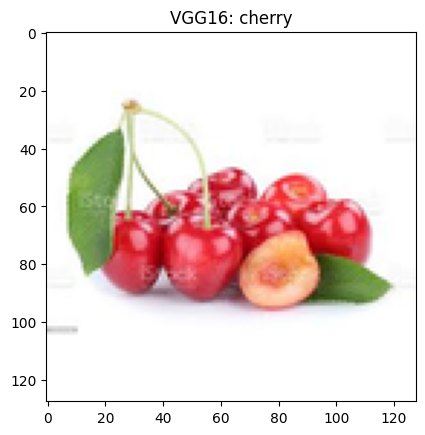

1/1 [==============================] - 0s 111ms/step
Image: 1.jpeg
VGG16 Prediction: banana



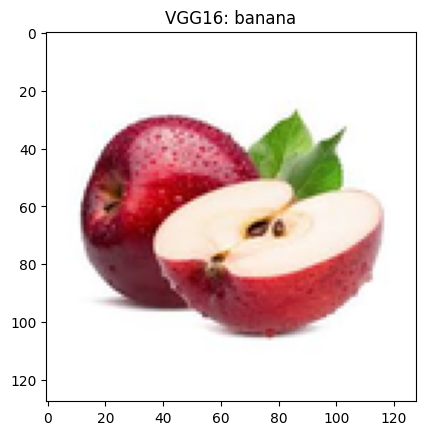

1/1 [==============================] - 0s 104ms/step
Image: img_31.jpeg
VGG16 Prediction: cherry



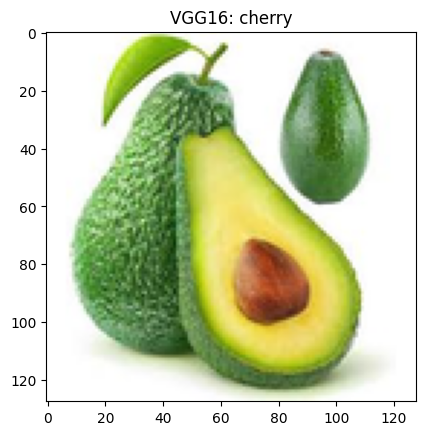

1/1 [==============================] - 0s 122ms/step
Image: img_301.jpeg
VGG16 Prediction: cherry



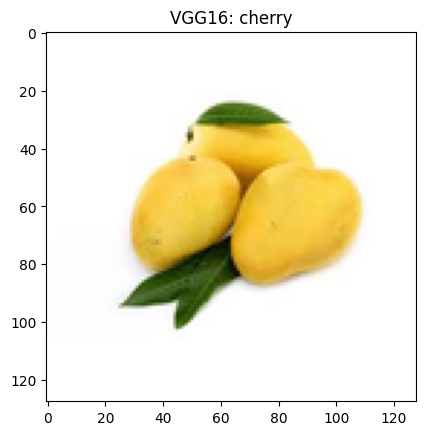

1/1 [==============================] - 0s 103ms/step
Image: 365.jpeg
VGG16 Prediction: avocado



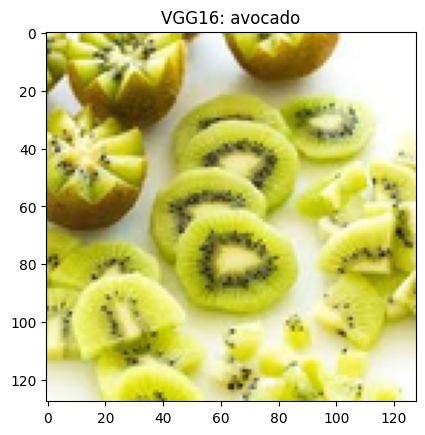

1/1 [==============================] - 0s 129ms/step
Image: img_41.jpeg
VGG16 Prediction: cherry



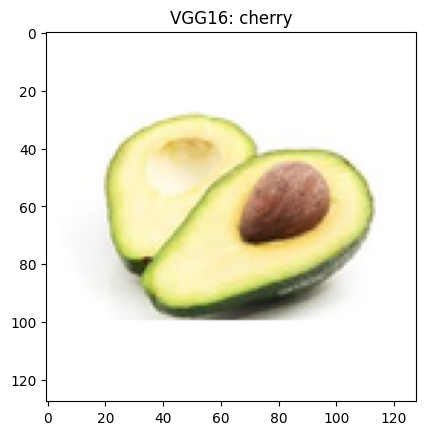

1/1 [==============================] - 0s 166ms/step
Image: 9.jpeg
VGG16 Prediction: cherry



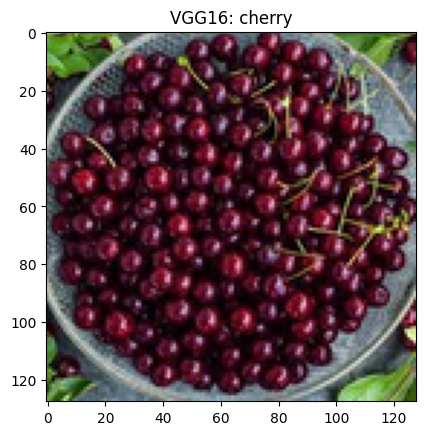

1/1 [==============================] - 0s 206ms/step
Image: 0124.jpeg
VGG16 Prediction: cherry



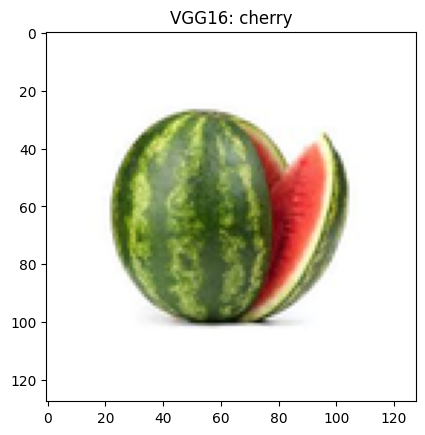

In [37]:
import os
import numpy as np
from PIL import Image
from keras.models import load_model, Model
from keras.layers import Flatten, Dense
from keras.applications.vgg16 import VGG16, preprocess_input
from keras import optimizers
from matplotlib import pyplot as plt

# Function to predict the class of an image using VGG16 because it was the more accurate model
def predict_image(classifier, image_array, classnames):
    img_features = image_array.astype('float32')
    img_features = preprocess_input(img_features)
    img_features = np.expand_dims(img_features, axis=0)
    predictions = classifier.predict(img_features)
    class_idx = np.argmax(predictions)
    return classnames[int(class_idx)]

# These are the classes our model can predict
classnames = ['avocado', 'kiwi', 'banana', 'cherry', 'apple', 'mango', 'orange', 'pineapple', 'strawberries', 'watermelon']

# Path to the folder with images to predict
predict_folder = '/content/gdrive/MyDrive/MY_data/predict'
predict_image_files = [f for f in os.listdir(predict_folder) if os.path.isfile(os.path.join(predict_folder, f))]

# Predict and display results for each image
for file_idx in range(len(predict_image_files)):
    img_path = os.path.join(predict_folder, predict_image_files[file_idx])
    img = Image.open(img_path)

    # Resize the image so it matches the input shape of the model
    resized_img = np.array(resize_image(img))

    # Predict using VGG16 model
    vgg16_prediction = predict_image(model, resized_img, classnames)

    # Display the results
    print(f"Image: {predict_image_files[file_idx]}")
    print(f"VGG16 Prediction: {vgg16_prediction}")
    print()

    # Optionally, display the image
    plt.imshow(resized_img)
    plt.title(f"VGG16: {vgg16_prediction}")
    plt.show()

# Step 5: Report

**Attempt 1:** 2 epoch for training and 1 epoch for transfer learning
Output Analysis:
1. The Val/Loss graph: The loss is trending down
2. The Confussion matrix: Not all squares are filled in, but some are able to achieve 'full accuracy'
3. Accuracy Rate in Transfer Learning: I had a low accuracy rate for my two models; VGG16: 56% accuracy and RESNET50: 20% accuracy

**Attempt 2:** Running the model again the entire model with 10 epochs and the transfer learning process to have 3 epochs each and use the VGG16 model. The accuracy remained somewhat the same;

1. The Val/Loss graph: The loss is trending still down, with some spikes and was able to get it lower than when had two epochs.
2. The Confussion matrix: Not all squares are filled in, but some are able to achieve 'full accuracy' and seems to be more than with the two epochs.
3. Accuracy Rate in Transfer Learning: VGG16: 64% accuracy and RESNET50: 16% accuracy, so it remained the same.







